# Question Phase:
    What features contribute to survival?
    What was the age differences amongst survivors?
    Which cabinents they stayed in.
    Gender differences? (Why not)
    Class Differences?
    How are cabinet and ages are releated
    Are there more adult (18+) or adolescent survivors?
    

In [17]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
import seaborn as sns

# Data Wrangling Phase

In [18]:
df = pd.read_csv('titanic_data.csv')
df.head(20)

# VARIABLE DESCRIPTIONS:
# survival        Survival
#                 (0 = No; 1 = Yes)
# pclass          Passenger Class
#                 (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name
# sex             Sex
# age             Age
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation
#                 (C = Cherbourg; Q = Queenstown; S = Southampton)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### There are NaN values in cabin, embarked, and age columns. 

______
|Col   | Amount |
|Age   |  177   |
|Cabin |  687   |
|Embkd |    2   |
+++++++++++++++++
|TOTAL  |  866  |


#### So for age we are best keeping the NaN or giving it a string representation "none" but it brings about the problem of not being able to run math on the colum without running into error. So dropping these values is best.   

#### As for Cabin, I'm wondering if "ship staff" weren't assigned a cabin. Going to have to look at the legend again -> the variable descriptions does not provide any further information to understnad blank cabins. 

In [19]:
# Dropping nan's from age
# print(df['Age'])
# print(df.iloc[17])
# df['Age'].dropna(inplace=True)
df.isnull().sum()
# Nan valu


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Nan Values



In [20]:
# Let's get the first letter of cabin as I'm guessing it may have more significance

# [x1] ->  get[first_letter]
def get_cabin_class(cabin):
    if type(cabin) is float:
        return cabin
    else:
        return cabin[0]
cabin = df['Cabin']    
cc = df['Cabin'].apply(get_cabin_class)
# print(df['Cabin'])
# linear alg transpose
df['Cabin_class'] = cc.T


### So let's take a look at some simple parameters (I'm guessing this is all the data)

#### 
#### 891 Passengers
#### Average Age: 29.69 Standard Deviation of 14.5
#### Mean Fare: 32.20 (guessing dollars) Standard Deviation of 49.69
#### Average # of children/parents aboard: .38 
#### Average # of sibling/spouses aboard: .52




In [21]:
# Let's look at how many unique names
# len(df['Name'].unique()) 891 out of 891 are unique

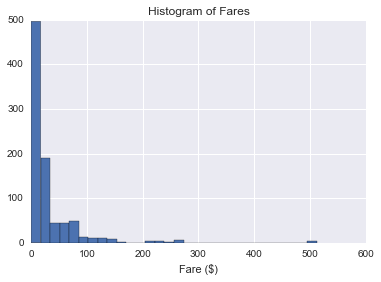

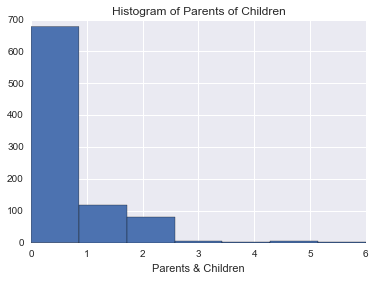

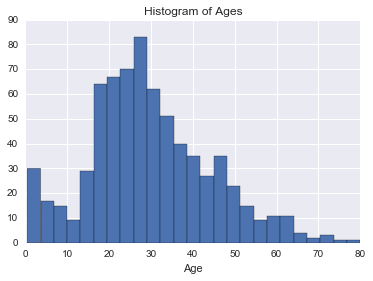

In [22]:
%matplotlib inline  
plt.hist( df['Fare'], bins=30)
plt.xlabel('Fare ($)')
plt.title(r'Histogram of Fares')
plt.show()

# plt.hist( df['Fare'].quantile(.50), bins=20)
# plt.xlabel('Quantile Fare ($)')
# plt.title(r'Histogram of Top Fares')
# plt.show()


plt.hist( df['Parch'], bins=7)
plt.xlabel('Parents & Children')
plt.title(r'Histogram of Parents of Children')
plt.show()

# print(df['Age'])
# had to drop na's or error would occur
plt.hist( df['Age'].dropna(), bins=25)
plt.xlabel('Age')
plt.title(r'Histogram of Ages')
plt.show()


## 

# Exploration Phase

###### Let's explore the data now. We will use .dropnas for age, we'll start by looking at variables that are correlated especially with "survival"

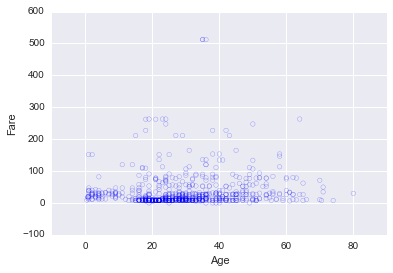

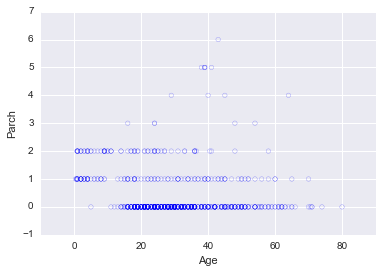

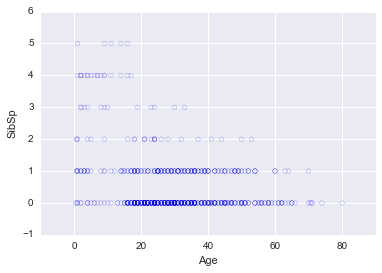

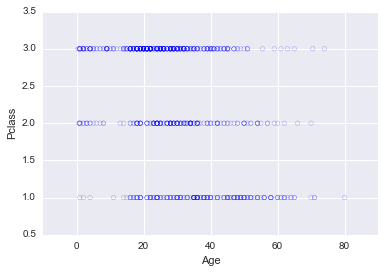

In [23]:
plt.scatter(df.Age,df.Fare, marker='o',edgecolor='b',facecolor='none',alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
slope, intercept = np.polyfit(df.Age,df.Fare,1)
plt.plot(df.Age,df.Fare*slope + intercept,'r')
plt.show()




plt.scatter(df.Age,df.Parch, marker='o',edgecolor='b',facecolor='none',alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Parch')
slope, intercept = np.polyfit(df.Age,df.Parch,1)
plt.plot(df.Age,df.Parch*slope + intercept,'r')
plt.show()

plt.scatter(df.Age,df.SibSp, marker='o',edgecolor='b',facecolor='none',alpha=0.5)
plt.xlabel('Age')
plt.ylabel('SibSp')
slope, intercept = np.polyfit(df.Age,df.SibSp,1)
plt.plot(df.Age,df.SibSp*slope + intercept,'r')
plt.show()

plt.scatter(df.Age,df.Pclass, marker='o',edgecolor='b',facecolor='none',alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Pclass')
slope, intercept = np.polyfit(df.Age,df.Pclass,1)
plt.plot(df.Age,df.Pclass*slope + intercept,'r')
plt.show()



In [24]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.

    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    
    xmean = x.mean()
    ymean = y.mean()
    
    x_stds = (x-xmean)/(x.std(ddof=0))
    y_stds = (y-ymean)/(y.std(ddof=0))
#     added plots to show standardised x and y to visualise relationship
    plt.plot(y_stds, x_stds, '.', alpha=0.8)
    m, b = np.polyfit(x_stds, y_stds, 1)
    plt.plot(x_stds, m*x_stds + b, '-')
    plt.show()
    
    print("Correlation is: ")
    print((x_stds*y_stds).mean())
    return (x_stds*y_stds).mean()




In [25]:
# correlation(df.Age, df.Parch)
# correlation(df.Age, df.Fare)
# correlation(df.Age, df.)

PassengerId   -0.035144
Survived      -0.338481
Pclass        -0.549500
Age           -0.369226
SibSp          0.083081
Parch          0.018443
Fare          -0.549500
dtype: float64


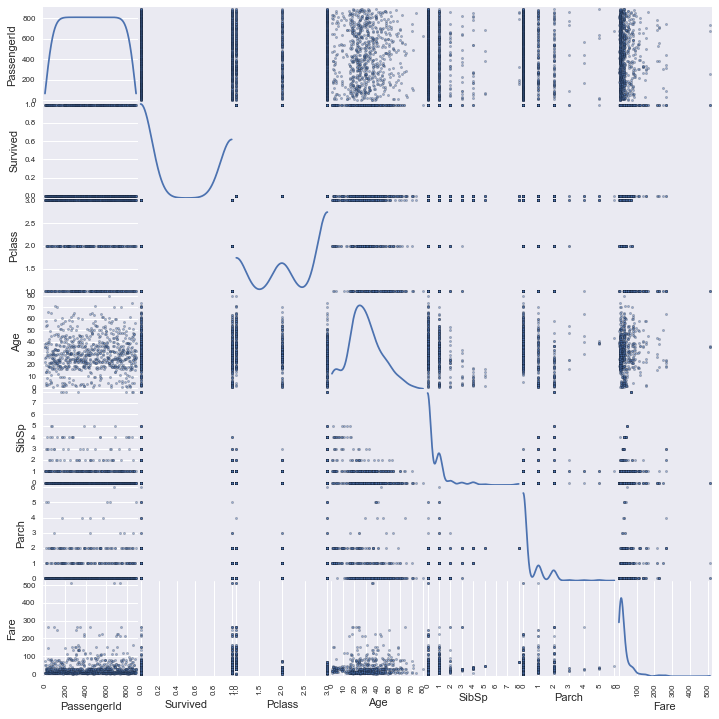

In [10]:
# Excerpt From: “Learning pandas.”
pd.scatter_matrix(df, diagonal='kde', figsize=(12,12));
corrs = df.corr()
# Is anything correlated higher than 30%
# print(corrs)

# Postive Correlated
positive_correlated = corrs[(corrs.values > 0) & (corrs.values < .6)]

# Negative correlated
negative_correlated = corrs[(corrs.values > -1) & (corrs.values < -.5)]

# Most highly correlated
print(negative_correlated.min())

# Pclass & Fare


###### By getting a brief look at the correlations between each feature in this correlation based scatter matrix, we are able to see if there are any obvious correlations and in general the relationships between each of the features.

In [11]:
x = df['Fare']
x.describe()
# plt.plot(x,mlab.normpdf(x,x.mean(),x.var()))

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

###### What features contribute to survival?

###### What was the age differences amongst survivors?

In [12]:
# Those that survived under 18
age = df['Age']
babies =   (age < 3) &  (age > 0.0)
children = (age < 13) & (age > 3)
teens =    (age < 18) & (age > 12)
adults =   (age < 75) & (age > 17)
elderly =  (age > 74)
survived = (df['Survived'] == 1)

print(df[babies]['Survived'].mean())
print(df[children]['Survived'].mean())
print(df[teens]['Survived'].mean())
print(df[adults]['Survived'].mean())
print(df[elderly]['Survived'].mean())
print("")
print(len(df[babies]))
print(len(df[children]))
print(len(df[teens]))
print(len(df[adults]))
print(len(df[elderly]))

age_counts = np.array([len(df[babies]),len(df[children]),len(df[teens]),len(df[adults]), len(df[elderly])])
survived_counts = np.array([len(df[babies & survived]),len(df[children & survived]),len(df[teens & survived]),len(df[adults & survived]), len(df[elderly & survived])])
initial_age_survived_counts = np.array([len(df[babies]),len(df[children]),len(df[teens]),len(df[adults]), len(df[elderly])])

survived_age_means = np.array([(df[babies & survived].mean()),(df[children & survived].mean()),(df[teens & survived].mean()),(df[adults & survived].mean()),(df[elderly & survived].mean())])
initial_age_means = np.array([(df[babies].mean()),(df[children].mean()),(df[teens].mean()),(df[adults].mean()),(df[elderly].mean())])

print(survived_age_means)

population_count = len(df)
survived_count = len(df[survived])
print("Population Count: {}".format(population_count))
print("Survived Count: {}".format(survived_count))




# df.groupby('Age')

# df[elderly]
df[babies & survived]

0.625
0.5128205128205128
0.4772727272727273
0.38
1.0

24
39
44
600
1
[[  5.06666667e+02   1.00000000e+00   2.40000000e+00   1.07800000e+00
    8.66666667e-01   1.33333333e+00   2.99050000e+01]
 [  4.73800000e+02   1.00000000e+00   2.45000000e+00   6.20000000e+00
    8.00000000e-01   1.30000000e+00   3.00197900e+01]
 [  4.09285714e+02   1.00000000e+00   2.04761905e+00   1.55238095e+01
    4.76190476e-01   4.76190476e-01   4.49384952e+01]
 [  4.61377193e+02   1.00000000e+00   1.76315789e+00   3.35899123e+01
    4.21052632e-01   3.94736842e-01   5.64834807e+01]
 [  6.31000000e+02   1.00000000e+00   1.00000000e+00   8.00000000e+01
    0.00000000e+00   0.00000000e+00   3.00000000e+01]]
Population Count: 891
Survived Count: 342


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_class
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,NaN
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S,NaN
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,F
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,C
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,F2,S,F
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C,NaN
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,NaN
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.00,0,1,3101298,12.2875,NaN,S,NaN
530,531,1,2,"Quick, Miss. Phyllis May",female,2.00,1,1,26360,26.0000,NaN,S,NaN
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,NaN


[24, 39, 44, 600, 1, 183]


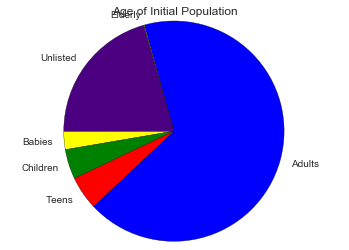

[15, 20, 21, 228, 1, 57]


(-1.0000000287589712,
 1.0030557489495846,
 -1.0030557563050511,
 1.0030557415941157)

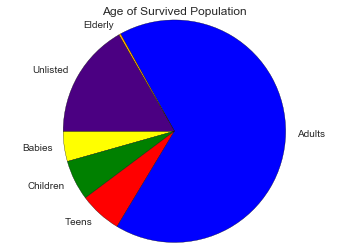

In [13]:
labels = ['Babies','Children','Teens','Adults', 'Elderly', 'Unlisted']
values = [len(df[babies]),len(df[children]),len(df[teens]),len(df[adults]), len(df[elderly]), (population_count-age_counts.sum())]
print(values)
colors = ['yellow','green','red','blue', 'orange', 'indigo']
plt.title('Age of Initial Population')
plt.pie(values,labels=labels,colors=colors,startangle=180)
plt.axis('equal')
plt.show()


labels = ['Babies','Children','Teens','Adults', 'Elderly', 'Unlisted']
values = [len(df[babies & survived]),len(df[children & survived]),len(df[teens & survived]),len(df[adults & survived]), len(df[elderly & survived]), (survived_count-survived_counts.sum())]
print(values)
colors = ['yellow','green','red','blue', 'orange', 'indigo']
plt.title('Age of Survived Population')
plt.pie(values,labels=labels,colors=colors,startangle=180)
plt.axis('equal')



In [14]:
# import numpy as np
# index = np.arange(5)
# values1 = [5,7,3,4,6]
# values2 = [6,6,4,5,7]
# values3 = [5,6,5,4,6]

# values1 = survived_age_means
# values2 = initial_age_means
# print(values2)

# bw = 0.3
# plt.axis([0,8,0,5])
# plt.title('A Multiseries Horizontal Bar Chart',fontsize=20)
# plt.barh(index,values1,bw,color='b')
# plt.barh(index+bw,values2,bw,color='g')
# plt.barh(index+2*bw,values3,bw,color='r')
# plt.yticks(index+0.4,['A','B','C','D','E'])

###### Cabinets and survival?


        PassengerId  Survived  Pclass  Age  SibSp  Parch       Fare
Sex                                                                
female        20451        36     139  NaN     51     19  1547.5626
male          56647        16     321  NaN     49     13  2374.5037


0


     PassengerId  Survived  Pclass  \
10            11         1       3   
205          206         0       3   
251          252         0       3   
394          395         1       3   

                                                  Name     Sex   Age  SibSp  \
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
205                         Strom, Miss. Telma Matilda  female   2.0      0   
251         Strom, Mrs. Wilhelm (Elna Matilda Persson)  female  29.0      1   
394  Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...  female  24.0      0   

     Parch   Ticket     Fare Cabin Embarked Cabin_class  
10       1  PP 9549  16.7000    G6        S           G  
205      1   347054

Cabin_class
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

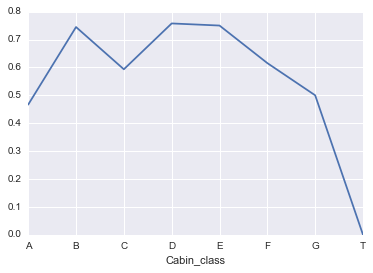

In [15]:
# df.describe()
agenulls = (df[((df['Age'].isnull()))])
agenull_grouped = agenulls.groupby('Sex')
print(agenull_grouped.sum())
print("")
print("")
print((df['Sex'] == 'Male').sum())
print("")
print("")
# all women in cabin_class G
print(df[(df['Cabin_class'] == 'G')])
# almost all male except 1
print(df[(df['Cabin_class'] == 'A')])
print(df['Cabin_class'].unique())



cabin_groups = df.groupby('Cabin_class')
print(cabin_groups.sum())
print(cabin_groups.mean())
cabin_means = cabin_groups['Survived'].mean()
cabin_means.plot()
cabin_means





In [16]:
df.groupby(['Cabin_class', 'Sex'])['Survived'].mean()
# Cabin_class g has the lowest level of female survivors

Cabin_class  Sex   
A            female    1.000000
             male      0.428571
B            female    1.000000
             male      0.400000
C            female    0.888889
             male      0.343750
D            female    1.000000
             male      0.466667
E            female    0.933333
             male      0.588235
F            female    1.000000
             male      0.375000
G            female    0.500000
T            male      0.000000
Name: Survived, dtype: float64

###### Gender differences?


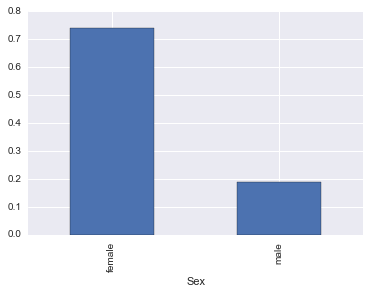

In [17]:


# df.describe()
gender_groups = df.groupby('Sex')
gender_survived_means = gender_groups['Survived'].mean()
gender_groups['Survived'].mean().plot(kind='bar')


# Conclusion Phase

# Communication Phase

On average, there was a larger ratio of women survivors as compared to men survivors


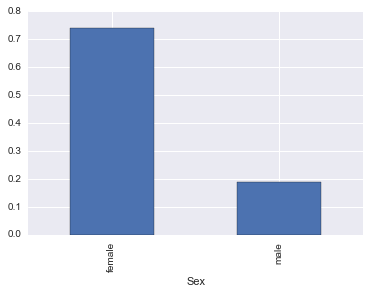

In [18]:
gender_groups = df.groupby('Sex')
# print(gender_groups.groups)

# gender_survived_means = gender_groups.mean()

print("On average, there was a larger ratio of women survivors as compared to men survivors")
gender_groups['Survived'].mean().plot(kind='bar')

#### So let's take a look at some simple parameters
#### 891 Passengers
#### Average Age: 29.69 Standard Deviation of 14.5
#### Mean Fare: 32.20 (guessing dollars) Standard Deviation of 49.69
#### Average # of children/parents aboard: .38
#### Average # of sibling/spouses aboard: .52

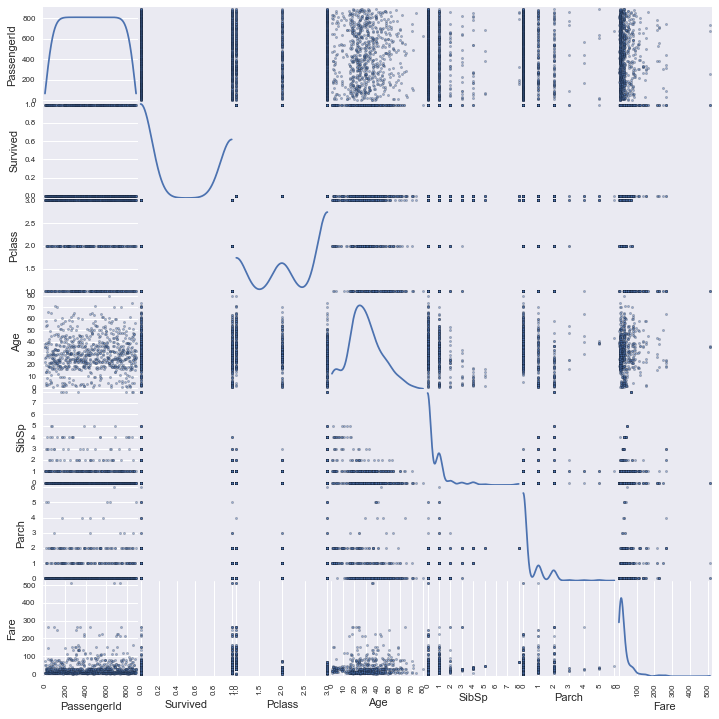

In [19]:
pd.scatter_matrix(df, diagonal='kde', figsize=(12,12));



In [12]:
# cclassg = df.groupby(['Pclass'])
# print(" - If we take a look at cabin classes, we see that most cabins sit about 50% survival rate")
# print(" - Cabins A and T(which had 0 survivors) have the lowest surival rates")
# print(" - If we take a look at cabin classes and the average fare cost we see that people paid the most for B, C, while significantly less was paid by the other classes") 
# cclassg['Survived'].mean().plot()
# plt.show()
# cclassg['Fare'].mean().plot()
# plt.show()
# plt.scatter(df['Fare'],df['Pclass'])




In [11]:
plt.scatter(df.Fare,df.Pclass, marker='o',edgecolor='b',facecolor='none',alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('PClass')
plt.show()
fare_class_corr = df.Fare.corr(df.Pclass)
print("Fare and Pclass are negatively correlated at {}; as pclass lowers the higher the fare,".format(fare_class_corr))
print("this is typical when 1st class is usually the most expensive ticket")

Fare and Pclass are negatively correlated at -0.5494996199439078; as pclass lowers the higher the fare,
this is typical when 1st class is usually the most expensive ticket


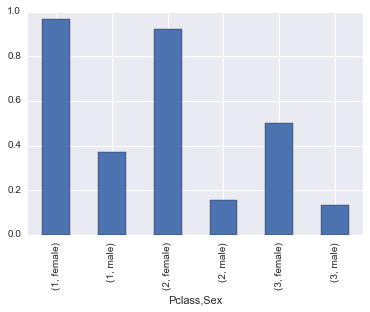

Grouping by Pclass and Sex, we see that both genders share a common trend: the relationship between 
class and survival is a negative one, those with Pclass closer to 1 survived more often than those closer to 3


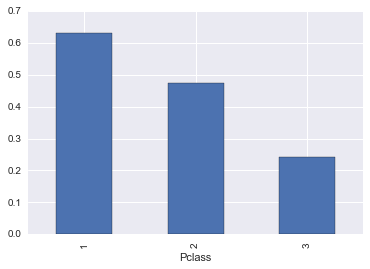

In [16]:
df.groupby(['Pclass','Sex'])['Survived'].mean().plot(kind="bar")

plt.show()
print("Grouping by Pclass and Sex, we see that both genders share a common trend: the relationship between ")
print("class and survival is a negative one, those with Pclass closer to 1 survived more often than those closer to 3")

df.groupby('Pclass')['Survived'].mean().plot(kind="bar")   


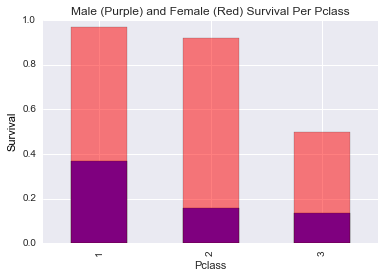

In [23]:
df[(df['Sex'] == 'male')].groupby(['Pclass'])['Survived'].mean().plot(kind='bar', alpha=1, color='b')
df[(df['Sex'] == 'female')].groupby(['Pclass'])['Survived'].mean().plot(kind='bar',color='r', alpha=0.5)
plt.grid(True)
plt.ylabel('Survival',color='black')
plt.title('Male (Purple) and Female (Red) Survival Per Pclass')


## Limitations

There are several limitations to the data that some that I've included earlier in the project. Specifically there are 866 nan values, which cannot be accounted for, which limit our ability to infer about the data. Since I did not conduct a t-test, z-test, nor did I do any proper hypothesis testing it so it should be made clear that all statistics have not been proven statistically significant. The feature set is limited and there could be many other features that are more helpful in understanding survival rate. Though gender, class, and cabin were important there could be other variables such as how many passengers knew each other or were friends but not related, or if they were ever in the water. But dealing with what we have thus far, this is what I've come up with.